In [27]:
import numpy as np
import pandas as pd
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Flatten 
from keras.layers import Dropout
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import backend as K

In [17]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [18]:
X_train.shape

(60000, 28, 28)

In [19]:
X_train = X_train.reshape((X_train.shape[0],28,28,1))

In [20]:
y_train.shape

(60000,)

In [21]:
num_count = np.zeros(10)

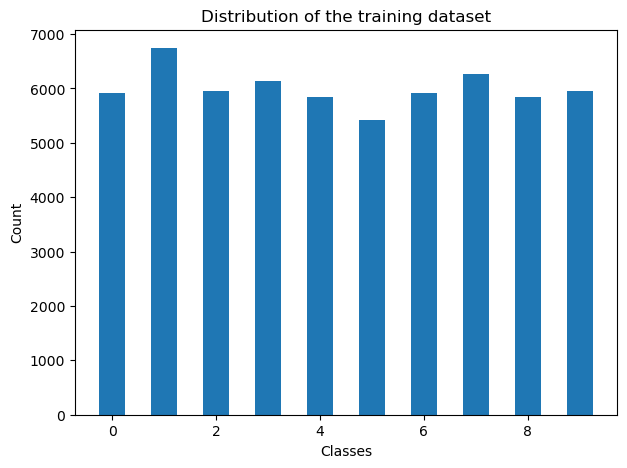

In [22]:
for i in y_train:
    num_count[i] += 1

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
y_label = list(set(y_train))
plt.bar(y_label,num_count,width=0.5)
plt.title("Distribution of the training dataset")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()


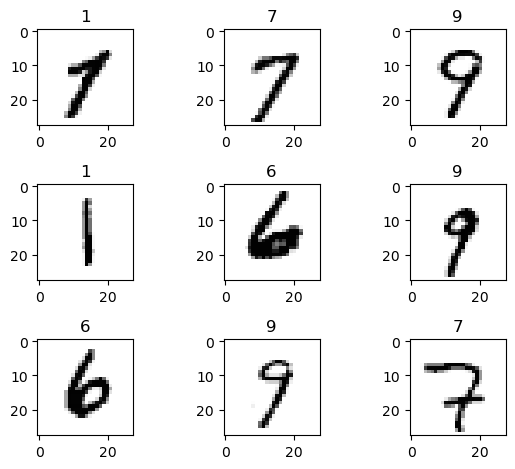

In [23]:
fig,ax = plt.subplots(3,3)
for i in range(3):
    for j in range(3):
        rand_num = np.random.randint(0,60000)
        ax[i,j].imshow(X_train[rand_num],cmap='Greys')
        ax[i,j].set_title(y_train[rand_num])
        plt.tight_layout()

In [24]:
X_test = X_test.reshape((X_test.shape[0],28,28,1))
input_shape = (28,28,1)
from keras.utils import to_categorical
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)
X_train = X_train/255
X_test = X_train/255

Creating the Model

In [28]:
num_classes = 10
epochs = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))